# Rental Bike Project

## Problem Definition

The objective of this case is to predict the bike rental count on a daily basis based on environmental and seasonal settings.

## Table of Contents

##### 1-Data Collection
- Importing the necessary libraries & packages
- Loading data
##### 2-Exploratory Data Analysis (EDA)
- Data visualization
- Attributes distributution & trends
- Data analysis
##### 3-Data Preprocessing
- Outlier analysis
- Data cleaning
- Feature selection
- Feature scaling 
##### 4-Train & Test Split 
##### 5-Optimization
- Dimensionality reduction
- hyperparameter optimization
##### 6-Model Development
##### 7-Cross Validation Prediction
##### 8-Models Performances
- Optimization impacts on models
- Models comparison
##### 9-Model Evaluation Metrics
##### 10-Conclusion 


## Goal and Hypothesis

Our goal is to build a predictive model that accurately forecasts the number of bike rentals for each day. To achieve this, we will gather data on various environmental factors, such as temperature, humidity, and wind speed, as well as seasonal settings like day of the week and month. By exploring and analyzing this data, we aim to identify patterns and relationships that can help us understand the factors influencing bike rental demand.

Hypothesis:
We hypothesize that the bike rental count is likely to be affected by factors such as weather conditions, day of the week, and holiday periods. For example, we expect that bike rentals might increase during warm and sunny days and decrease during cold or rainy days. Additionally, we anticipate higher demand during weekends and holiday seasons compared to weekdays.

By testing and validating our hypothesis through data analysis and modeling, we hope to develop a robust predictive system that can be used for effective bike fleet management and meeting customer demand.

Let's start our journey by collecting and exploring the data to uncover valuable insights for our rental bike project!

##### 1 - Data Collection

- Importing necessary libraries


In [1]:
#TODO import libraries

- Loading data

In [2]:
#TODO read the data file

##### 2 - Exploratory Data Analysis(EDA)

- Data visualization


In [3]:
#TODO creating histograms,scatter plots,box plots gathering general insights via visualizing

- Attributes distributution & trends

In [4]:

#TODO creating monthly,yearly,daily,weekly plots and visuals

- Data analysis

In [5]:
#TODO discover patterns and relationships

##### 3 - Data Preprocessing

- Outlier analysis


In [6]:
#TODO discover outliers and decide to remove or not

- Data cleaning

In [7]:
#TODO step 1-type casting & type checking
#TODO step 2-duplicate checking
#TODO step 3-missing value checking 
#TODO step 4-null value checking

- Feature selection


In [8]:
#TODO step 1-correlation analysis and correlation matrix
#TODO step 2-chi-square test
#TODO step 3-variance analysis(Anova) test
#TODO step 4-Multicollinearity test

- Feature scaling 


In [9]:
#TODO normalization

##### 4 - Train & Test Split 


In [10]:
#TODO create a Train and Test (maybe use other months or generally other data)

##### 5 - Optimization


- Dimensionality reduction


In [11]:
#TODO dimensionality reduction using PCA

- hyperparameter optimization

In [12]:
#TODO hyperparameter optimizing

##### 6 - Model Development


In [13]:
#TODO introduce different models such as "Random Forest","Decision Tree Regressor","Lasso Regression","Ridge Regression","Linear Regression"
#TODO train different models introduces above

##### 7 - Cross Validation Prediction


In [14]:
#TODO CV prediction for all the models

##### 8 - Models Performances


- Optimization impacts on models


In [15]:
#TODO compare the performances with & without PCA

- Models comparison


In [16]:
#TODO compare different models performances

##### 9 - Model Evaluation Metrics


In [17]:
#TODO R-squared score
#TODO Root mean square error
#TODO Mean absolute error

##### 10 - Conclusion 

In [18]:
#TODO Choosing best model

In [19]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import cartesian
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [20]:
def preprocess_trips(trips_df):

    trips_df.dropna(inplace=True)
    
    cols_to_drop = ["member_casual", "rideable_type", ]
    trips_df.drop(cols_to_drop, axis=1, inplace=True)

    locations = trips_df['start_station_id'].unique()
    new_ids = list(range(len(locations)))
    mapping = dict(zip(locations, new_ids))
    
    trips_df['start_station_id'] = trips_df['start_station_id'].map(mapping)
    trips_df['end_station_id'] = trips_df['end_station_id'].map(mapping)

    trips_df["started_at"] = pd.to_datetime(trips_df["started_at"], format="%Y-%m-%d %H:%M:%S")
    trips_df["ended_at"] = pd.to_datetime(trips_df["ended_at"], format="%Y-%m-%d %H:%M:%S")
    
    trips_df['tripduration'] = (trips_df['ended_at'] - trips_df['started_at']).dt.total_seconds() / 60.0

    trips_df = trips_df.sort_values(by="started_at")
    
    return trips_df

In [21]:
trips = pd.read_csv("../Data/divvybikes-data/divvybikes-test.csv")
trips.head()
preprocess_trips(trips)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,tripduration
74346,5DB63F4E4EB6A9CF,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Ave,513,Pine Grove Ave & Waveland Ave,260.0,41.9359,-87.6784,41.9493,-87.6463,22.550000
46139,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,56,Wabash Ave & 9th St,12.0,41.8604,-87.6258,41.8708,-87.6257,8.166667
17735,6D93A270684EC452,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Ave,513,Spaulding Ave & Armitage Ave,418.0,41.9359,-87.6784,41.9171,-87.7102,21.650000
53075,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Ave,5,Clark St & Schiller St,192.0,41.8969,-87.6217,41.9080,-87.6315,7.283333
46138,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01 00:11:51,Wabash Ave & 9th St,12,Wabash Ave & 9th St,12.0,41.8708,-87.6257,41.8708,-87.6257,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...
80628,042ED7E4DB510E06,2020-04-30 23:46:32,2020-04-30 23:53:36,Dearborn St & Monroe St,372,Wabash Ave & Grand Ave,141.0,41.8813,-87.6295,41.8915,-87.6268,7.066667
47438,7CE956F2ADAB70E7,2020-04-30 23:52:12,2020-04-30 23:58:28,Sheffield Ave & Waveland Ave,160,Clark St & Grace St,41.0,41.9494,-87.6545,41.9508,-87.6592,6.266667
2970,7DD8DE9332472655,2020-04-30 23:54:57,2020-05-01 00:28:29,Sheffield Ave & Webster Ave,340,Sheffield Ave & Webster Ave,340.0,41.9215,-87.6538,41.9215,-87.6538,33.533333
47103,3F2515CBB67A52E2,2020-04-30 23:57:13,2020-05-01 00:12:08,California Ave & Altgeld St,411,Southport Ave & Clybourn Ave,211.0,41.9267,-87.6977,41.9208,-87.6637,14.916667


trips['started_at'] = pd.to_datetime(trips['started_at'])
trips['ended_at'] = pd.to_datetime(trips['ended_at'])
trips['tripduration'] = (trips['ended_at'] - trips['started_at']).dt.total_seconds() / 60.0

#trips.head()


cols_to_drop = ["member_casual", "rideable_type", ]
trips.dropna(inplace=True)
trips.drop(cols_to_drop, axis=1, inplace=True)
#trips.head()

locations = trips['start_station_id'].unique()
new_ids = list(range(len(trips['start_station_id'].unique())))
mapping = dict(zip(locations, new_ids))

trips['start_station_id'] = trips['start_station_id'].map(mapping)
trips['end_station_id'] = trips['end_station_id'].map(mapping)
#trips.head()

trips = trips.sort_values(by="started_at")
#trips.head()

<Axes: xlabel='index', ylabel='trips_per_hour'>

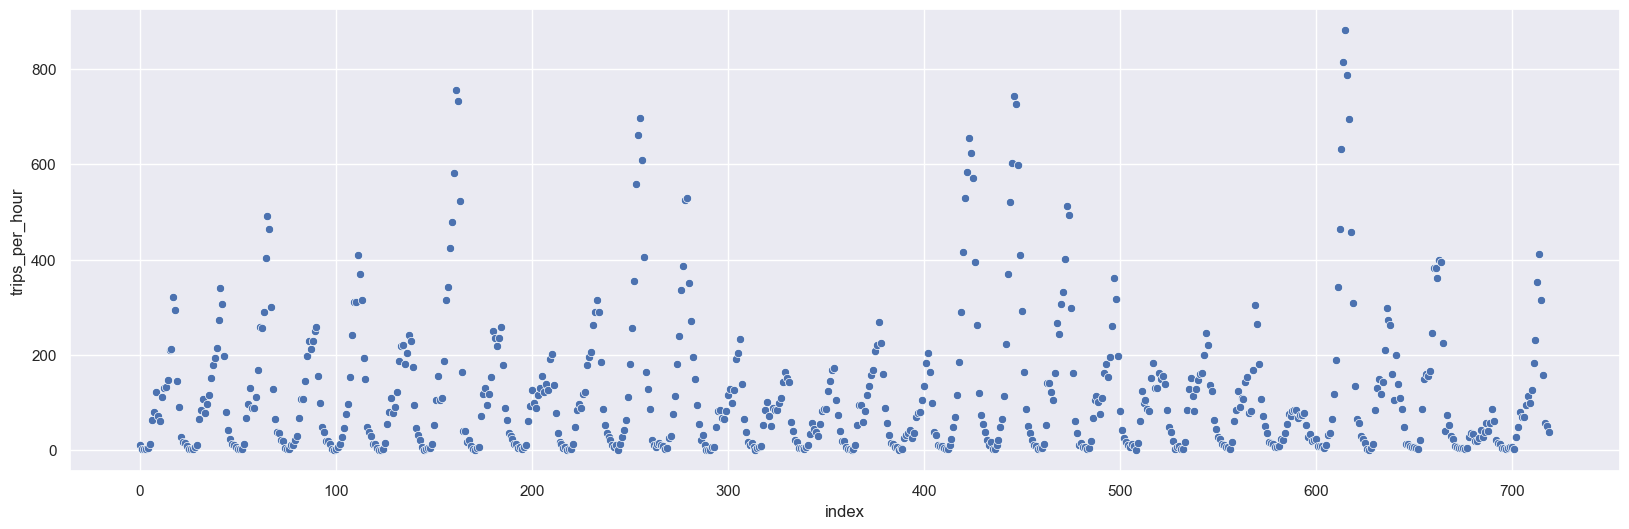

In [22]:
from datetime import datetime, timedelta
import seaborn as sns
sns.set(rc={'figure.figsize':(20,6)})

trips["started_at"] = pd.to_datetime(trips["started_at"], format="%Y-%m-%d %H:%M:%S")
trips["ended_at"] = pd.to_datetime(trips["ended_at"], format="%Y-%m-%d %H:%M:%S")

start_date = datetime.strptime("2020-04-01 00:00:30", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2020-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=60)
bucket_elements = []
while start_date <= end_date:
    bucket_elements.append(trips[((start_date + interval) >= trips["ended_at"])
                                & (start_date <= trips["ended_at"])].shape[0])
    start_date += interval

sns.scatterplot(x="index", y="trips_per_hour", data=pd.DataFrame(bucket_elements, columns=["trips_per_hour"]).reset_index())

In [23]:
outgoing_trips = trips.groupby("start_station_id").count()["ride_id"].values
incoming_trips = trips.groupby("end_station_id").count()["ride_id"].values

all_station_ids = set(trips["start_station_id"].unique()) | set(trips["end_station_id"].unique())

outgoing_trips = np.pad(outgoing_trips, (0, len(all_station_ids) - len(outgoing_trips)), mode='constant')
incoming_trips = np.pad(incoming_trips, (0, len(all_station_ids) - len(incoming_trips)), mode='constant')

outgoing_trips = (outgoing_trips - np.min(outgoing_trips)) / (np.max(outgoing_trips) - np.min(outgoing_trips))
incoming_trips = (incoming_trips - np.min(incoming_trips)) / (np.max(incoming_trips) - np.min(incoming_trips))

node_features = np.stack([outgoing_trips, incoming_trips]).transpose()
print("Full shape: ", node_features.shape)
node_features[:10]

Full shape:  (603, 2)


array([[0.26      , 0.26203807],
       [0.09647059, 0.09742441],
       [0.47647059, 0.44008959],
       [0.20941176, 0.22732363],
       [0.18823529, 0.16797312],
       [0.46588235, 0.40761478],
       [0.23647059, 0.17581187],
       [0.11058824, 0.0862262 ],
       [0.34705882, 0.32698768],
       [0.06470588, 0.06942889]])

In [24]:

subset = ["start_lng", "start_lat", "start_station_id"]
all_starts = trips.drop_duplicates(subset="start_station_id", keep="first")[subset]

subset = ["end_lng", "end_lat", "end_station_id"]
all_ends = trips.drop_duplicates(subset="end_station_id", keep="first")[subset]
distance_matrix = all_ends.merge(all_starts, how="cross")
distance_matrix["distance"] = distance_matrix.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), 
                                                        (x["end_lat"], x["end_lng"])).meters, axis=1)
#distance_matrix.head()

In [25]:
distance_matrix["edge"] = distance_matrix["distance"] < 500
#distance_matrix.head()

In [26]:
edge_index = distance_matrix[distance_matrix["edge"] == True][["start_station_id", "end_station_id"]].values
edge_index = edge_index.transpose()
#edge_index

In [27]:
distance_feature = distance_matrix[distance_matrix["edge"] == True]["distance"].values
edge_type_feature = np.zeros_like(distance_feature)
trip_duration_feature = np.zeros_like(distance_feature) 
static_edge_features = np.stack([distance_feature, edge_type_feature, trip_duration_feature]).transpose()
#static_edge_features

In [28]:
def extract_dynamic_edges(s):

    trip_indices = s[["start_station_id", "end_station_id"]].values
    trip_durations = s["tripduration"]

    distance_feature  = pd.DataFrame(trip_indices, 
                                    columns=["start_station_id", "end_station_id"]).merge(
                                        distance_matrix, on=["start_station_id", "end_station_id"], 
                                        how="left")["distance"].values
    edge_type_feature = np.ones_like(distance_feature) 
    trip_duration_feature = trip_durations
    edge_features = np.stack([distance_feature, edge_type_feature, trip_duration_feature]).transpose()
    return edge_features, trip_indices.transpose()

In [29]:
start_date = datetime.strptime("2020-04-01 00:00:30", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2020-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=60)

xs = []
edge_indices = []
ys = []
y_indices = []
edge_features = []


while start_date <= end_date:
    # 0 - 60 min 
    current_snapshot = trips[((start_date + interval) >= trips["ended_at"])
                                & (start_date <= trips["ended_at"])]
    # 60 - 120 min
    subsequent_snapshot = trips[((start_date + 2*interval) >= trips["ended_at"])
                                & (start_date + interval <= trips["ended_at"])]


    current_snapshot = current_snapshot.groupby(["start_station_id", "end_station_id"]).mean().reset_index()
    subsequent_snapshot = subsequent_snapshot.groupby(["start_station_id", "end_station_id"]).mean().reset_index()

    edge_feats, additional_edge_index = extract_dynamic_edges(current_snapshot)
    exteneded_edge_index = np.concatenate([edge_index, additional_edge_index], axis=1)
    extended_edge_feats = np.concatenate([edge_feats, static_edge_features], axis=0)


    y = subsequent_snapshot["tripduration"].values
    y_index = subsequent_snapshot[["start_station_id", "end_station_id"]].values

    xs.append(node_features) 
    edge_indices.append(exteneded_edge_index)
    edge_features.append(extended_edge_feats)
    ys.append(y) 
    y_indices.append(y_index.transpose())

    start_date += interval

In [30]:
i = 3
print(f"""Example of graph snapshot {i}: \n
      Node feature shape: {xs[i].shape} \n
      Edge index shape: {edge_indices[i].shape} \n
      Edge feature shape: {edge_features[i].shape} \n 
      Labels shape: {ys[i].shape} \n
      Labels mask shape: {y_indices[i].shape}
      """)

Example of graph snapshot 3: 

      Node feature shape: (603, 2) 

      Edge index shape: (2, 1945) 

      Edge feature shape: (1945, 3) 
 
      Labels shape: (4,) 

      Labels mask shape: (2, 4)
      


In [31]:
from torch_geometric_temporal.signal import DynamicGraphTemporalSignal
dataset = DynamicGraphTemporalSignal(
            edge_indices, edge_features, xs, ys, y_indices=y_indices
        )

##### Statical reports

In [32]:
dataset[3].x

tensor([[0.2600, 0.2620],
        [0.0965, 0.0974],
        [0.4765, 0.4401],
        ...,
        [0.0012, 0.0000],
        [0.0012, 0.0000],
        [0.0000, 0.0000]])

In [33]:
time_step = 3
graph_at_t = dataset[time_step]
edge_indices_t = graph_at_t.edge_index
edge_features_t = graph_at_t.edge_attr
node_features_t = graph_at_t.x

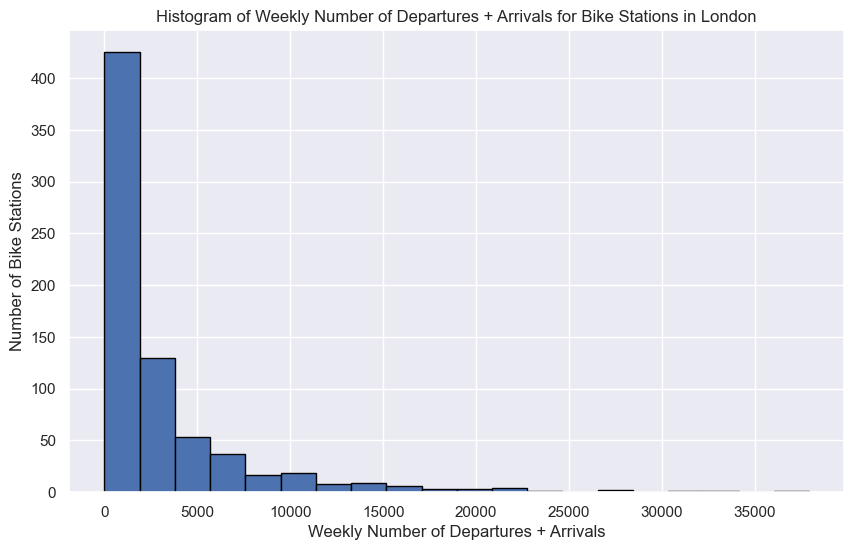

In [34]:

num_snapshots = dataset.snapshot_count

weekly_departures_arrivals = []
for time_index in range(num_snapshots):
    node_data = dataset[time_index].y.sum(dim=0) 
    weekly_sum = node_data.sum().item()
    weekly_departures_arrivals.append(weekly_sum)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(weekly_departures_arrivals, bins=20, edgecolor='black')
plt.xlabel('Weekly Number of Departures + Arrivals')
plt.ylabel('Number of Bike Stations')
plt.title('Histogram of Weekly Number of Departures + Arrivals for Bike Stations in London')
plt.grid(True)
plt.show()


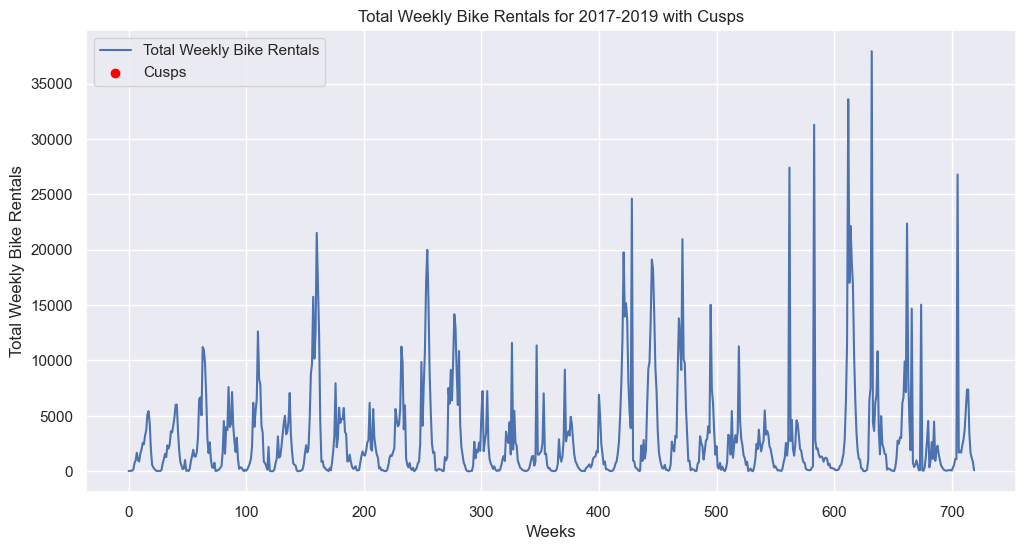

In [35]:
num_snapshots = dataset.snapshot_count

total_weekly_rentals = []
for time_index in range(num_snapshots):
    node_data = dataset[time_index].y.sum(dim=0)  
    total_rentals = node_data.sum().item()
    total_weekly_rentals.append(total_rentals)

threshold = 300000

cusps_indices = []
for i in range(1, len(total_weekly_rentals) - 1):
    if (
        total_weekly_rentals[i] > total_weekly_rentals[i - 1]
        and total_weekly_rentals[i] > total_weekly_rentals[i + 1]
        and total_weekly_rentals[i] > threshold
    ):
        cusps_indices.append(i)

plt.figure(figsize=(12, 6))
plt.plot(total_weekly_rentals, label='Total Weekly Bike Rentals')
plt.scatter(cusps_indices, [total_weekly_rentals[i] for i in cusps_indices], color='red', label='Cusps')
plt.xlabel('Weeks')
plt.ylabel('Total Weekly Bike Rentals')
plt.title('Total Weekly Bike Rentals for 2017-2019 with Cusps')
plt.legend()
plt.grid(True)
plt.show()
